In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar

In [2]:
df = pd.read_csv(r"E:\download\cosmic\pro\congo\unemployment in india\Unemployment_Rate_upto_11_2020.csv")

In [3]:
df.head(5)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [4]:
print(f'The dataset has {df.shape[0]} rows')
print(f'The dataset has {df.shape[1]} columns')

The dataset has 267 rows
The dataset has 9 columns


In [5]:
df = df.rename(columns={'Region' : 'States', ' Date' : 'Date',' Frequency': 'Frequency' ,
                        ' Estimated Unemployment Rate (%)' : 'Est_Unemp_Rate', ' Estimated Employed' : 'Est_Emp',
                        ' Estimated Labour Participation Rate (%)' : 'Est_Labour_Rate'}).reset_index(drop = True)

In [6]:
df['Est_Emp'] = round((df['Est_Emp']/1000000),2)

df.head(5)

,States,Date,Frequency,Est_Unemp_Rate,Est_Emp,Est_Labour_Rate,Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16.64,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16.55,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15.88,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11.34,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12.99,36.46,South,15.9129,79.74


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   States           267 non-null    object 
 1   Date             267 non-null    object 
 2   Frequency        267 non-null    object 
 3   Est_Unemp_Rate   267 non-null    float64
 4   Est_Emp          267 non-null    float64
 5   Est_Labour_Rate  267 non-null    float64
 6   Region.1         267 non-null    object 
 7   longitude        267 non-null    float64
 8   latitude         267 non-null    float64
dtypes: float64(5), object(4)
memory usage: 18.9+ KB


In [8]:
df.isnull().sum()

States             0
Date               0
Frequency          0
Est_Unemp_Rate     0
Est_Emp            0
Est_Labour_Rate    0
Region.1           0
longitude          0
latitude           0
dtype: int64

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\hp\AppData\Local\Temp\ipykernel_3432\2394721818.py:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [10]:
df_stat = df[['Est_Unemp_Rate', 'Est_Emp', 'Est_Labour_Rate']]
round(df_stat.describe(),2)

,Est_Unemp_Rate,Est_Emp,Est_Labour_Rate
count,267.00,267.00,267.00
mean,12.24,13.96,41.68
std,10.80,13.37,7.85
min,0.50,0.12,16.77
25%,4.84,2.84,37.26
50%,9.65,9.73,40.39
75%,16.76,21.88,44.06
max,75.85,59.43,69.69


In [11]:
for col in df.columns:
   pct_missing = np.mean(df[col].isnull())
   print('{}--{}%'.format(col, pct_missing))


States--0.0%
Date--0.0%
Frequency--0.0%
Est_Unemp_Rate--0.0%
Est_Emp--0.0%
Est_Labour_Rate--0.0%
Region.1--0.0%
longitude--0.0%
latitude--0.0%


In [12]:
df = df.fillna(value = 0)

In [13]:
df.dtypes

States                     object
Date               datetime64[ns]
Frequency                  object
Est_Unemp_Rate            float64
Est_Emp                   float64
Est_Labour_Rate           float64
Region.1                   object
longitude                 float64
latitude                  float64
dtype: object

In [14]:
df.drop_duplicates()

,States,Date,Frequency,Est_Unemp_Rate,Est_Emp,Est_Labour_Rate,Region.1,longitude,latitude
0,Andhra Pradesh,2020-01-31,M,5.48,16.64,41.02,South,15.9129,79.740
1,Andhra Pradesh,2020-02-29,M,5.83,16.55,40.90,South,15.9129,79.740
2,Andhra Pradesh,2020-03-31,M,5.79,15.88,39.18,South,15.9129,79.740
3,Andhra Pradesh,2020-04-30,M,20.51,11.34,33.10,South,15.9129,79.740
4,Andhra Pradesh,2020-05-31,M,17.43,12.99,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,2020-06-30,M,7.29,30.73,40.39,East,22.9868,87.855
263,West Bengal,2020-07-31,M,6.83,35.37,46.17,East,22.9868,87.855
264,West Bengal,2020-08-31,M,14.87,33.30,47.48,East,22.9868,87.855
265,West Bengal,2020-09-30,M,9.35,35.71,47.73,East,22.9868,87.855


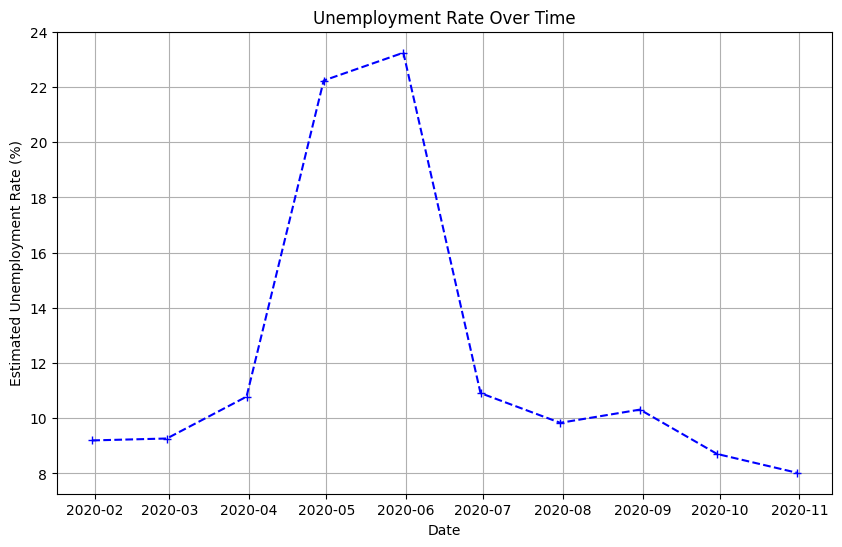

In [15]:
mean_unemployment_over_time = df.groupby('Date')['Est_Unemp_Rate'].mean()

# Create a line plot

plt.figure(figsize=(10, 6))
plt.plot(mean_unemployment_over_time.index, mean_unemployment_over_time.values, marker='+', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')
plt.grid(True)

plt.show()

([<matplotlib.patches.Wedge at 0x27327a930d0>,
 [Text(0.6580274520410341, 0.8814759624404881, 'North'),
  Text(-0.9221849750651983, 0.5996456218167525, 'South'),
  Text(-0.8286218916803177, -0.7234540487329738, 'West'),
  Text(0.2249033727451292, -1.0767629604178748, 'East'),
  Text(0.9918665601566129, -0.47560564214808076, 'Northeast')],
 [Text(0.3589240647496549, 0.48080507042208437, '30%'),
  Text(-0.503009986399199, 0.32707943008186496, '22%'),
  Text(-0.45197557728017324, -0.39461129930889477, '19%'),
  Text(0.12267456695188864, -0.5873252511370225, '15%'),
  Text(0.5410181237217888, -0.2594212593534986, '14%')])

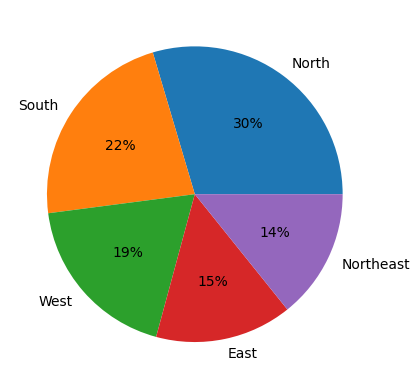

In [16]:
region = df['Region.1'].value_counts()
plt.pie(region,labels=region.keys(),autopct='%.0f%%')

C:\Users\hp\AppData\Local\Temp\ipykernel_3432\1636798520.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region.1',data=df,palette="Set2")


<Axes: xlabel='Region.1', ylabel='count'>

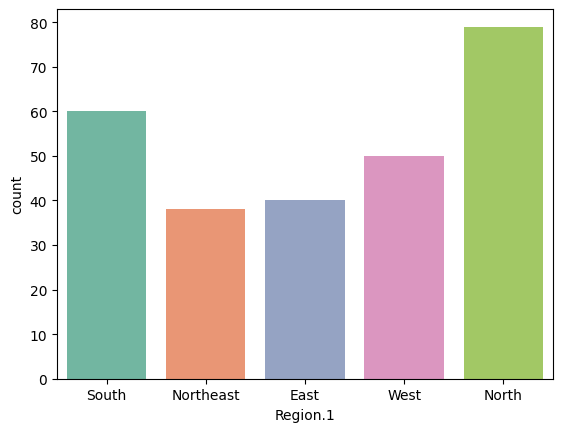

In [17]:
sns.countplot(x='Region.1',data=df,palette="Set2") 

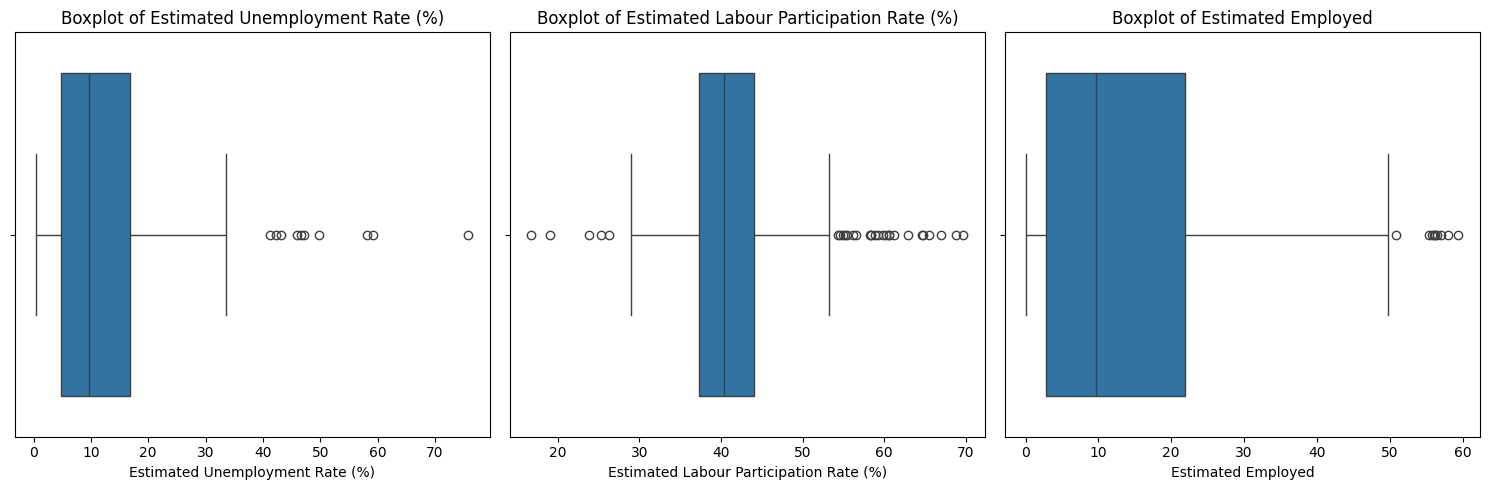

In [18]:
ig, axes = plt.subplots(1, 3, figsize=(15, 5))


sns.boxplot(x=df['Est_Unemp_Rate'], ax=axes[0])
axes[0].set_xlabel('Estimated Unemployment Rate (%)')
axes[0].set_title('Boxplot of Estimated Unemployment Rate (%)')


sns.boxplot(x=df['Est_Labour_Rate'], ax=axes[1])
axes[1].set_xlabel('Estimated Labour Participation Rate (%)')
axes[1].set_title('Boxplot of Estimated Labour Participation Rate (%)')


sns.boxplot(x=df['Est_Emp'], ax=axes[2])
axes[2].set_xlabel('Estimated Employed')
axes[2].set_title('Boxplot of Estimated Employed')

plt.tight_layout()
plt.show()

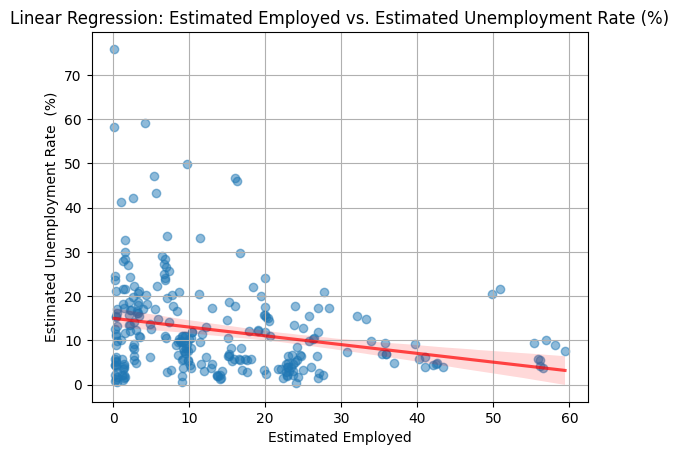

In [19]:
sns.regplot(x='Est_Emp',y='Est_Unemp_Rate', data=df,scatter_kws={'alpha': 0.5},line_kws={'alpha': 0.7, 'color': 'red'})
plt.ylabel('Estimated Unemployment Rate  (%)')
plt.xlabel('Estimated Employed')
plt.title('Linear Regression: Estimated Employed vs. Estimated Unemployment Rate (%)')
plt.grid(True)

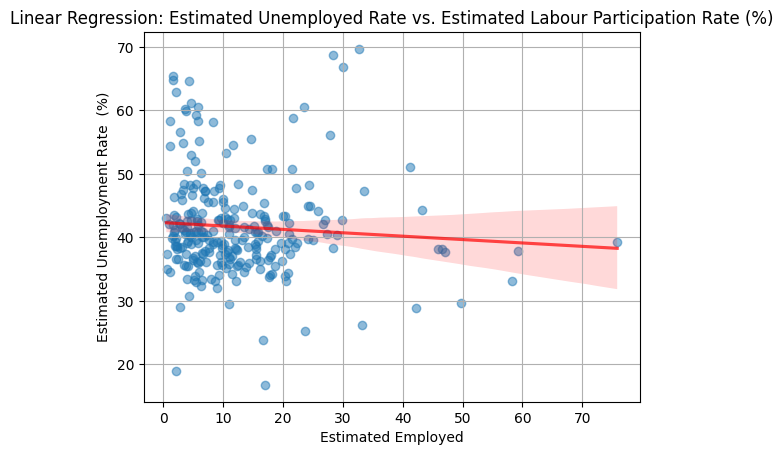

In [20]:
sns.regplot(x='Est_Unemp_Rate',y='Est_Labour_Rate', data=df,scatter_kws={'alpha': 0.5},line_kws={'alpha': 0.7, 'color': 'red'})
plt.ylabel('Estimated Unemployment Rate  (%)')
plt.xlabel('Estimated Employed')
plt.title('Linear Regression: Estimated Unemployed Rate vs. Estimated Labour Participation Rate (%)')
plt.grid(True)

<Axes: >

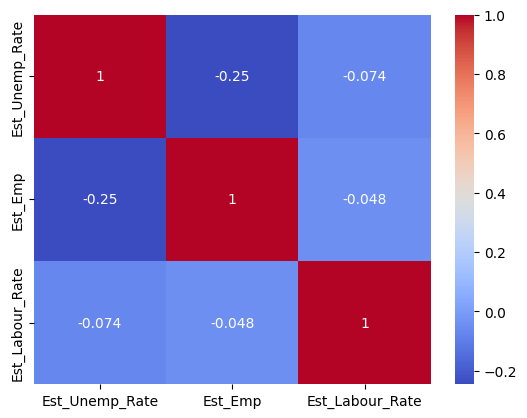

In [21]:
sns.heatmap(df[['Est_Unemp_Rate',"Est_Emp","Est_Labour_Rate"]].corr(),annot=True,cmap='coolwarm')